In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
import astropy.constants as const
import juanfit
import copy
from scipy import interpolate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.integrate import simps
from scipy.signal import find_peaks
rcParams['axes.linewidth'] = 1.2
import cmcrameri.cm as cmcm

In [2]:
m_p = const.m_p.cgs.value
k_b = const.k_B.cgs.value
c = const.c.cgs.value
rs = const.R_sun.cgs.value

In [53]:
#read dataset
awsom_data_set = scipy.io.readsav('../../save/spectrum/box/box_2063_v2.sav',verbose = True,python_dict=True)

--------------------------------------------------
Date: Thu Nov 18 18:02:08 2021
User: yjzhu
Host: ptolemy.engin.umich.edu
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.7.2
--------------------------------------------------
Successfully read 6 records of which:
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 3 are of type VARIABLE
--------------------------------------------------
Available variables:
 - x [<class 'numpy.ndarray'>]
 - w [<class 'numpy.ndarray'>]
 - param [<class 'numpy.ndarray'>]
--------------------------------------------------


In [59]:
awsom_FeVIII186_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeVIII_186_ctb.sav",
                        python_dict=True)

awsom_FeXII192_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeXII_192_ctb.sav",
                        python_dict=True)

In [77]:
awsom_FeVIII186_ctb_dataset["w"].shape

(41, 601, 350)

In [80]:
p_e_ratio = 0.83
awsom_x = awsom_data_set['x'][0,0,0,:]
awsom_y = awsom_data_set['x'][1,0,:,0]
awsom_z = awsom_data_set['x'][2,:,0,0]
rho = awsom_data_set['w'][0,:,:,:]
n = rho/m_p
#n = np.nan_to_num(n,nan=0)
ux = awsom_data_set['w'][1,:,:,:]
uy = awsom_data_set['w'][2,:,:,:]
uz = awsom_data_set['w'][3,:,:,:]
bx = awsom_data_set['w'][4,:,:,:]
by = awsom_data_set['w'][5,:,:,:]
bz = awsom_data_set['w'][6,:,:,:]
I01 = awsom_data_set['w'][7,:,:,:]
I02 = awsom_data_set['w'][8,:,:,:]
p = awsom_data_set['w'][9,:,:,:]
t = p/n/k_b
#t = np.nan_to_num(t,nan=1e3)
p_e = awsom_data_set['w'][10,:,:,:]
t_e = p_e/n/k_b
t_e = np.nan_to_num(t_e,nan=1e3)
n = np.nan_to_num(n,nan=1)
n = n + 1
b_tot = np.sqrt(np.square(bx) + np.square(by) + np.square(bz))
u_tot = np.sqrt(np.square(ux) + np.square(uy) + np.square(uz))
bx_rot = np.zeros_like(bx)
by_rot = np.zeros_like(by)
bz_rot = np.zeros_like(bz)
ux_rot = np.zeros_like(ux)
uy_rot = np.zeros_like(uy)
uz_rot = np.zeros_like(uz)

rot_DD = np.resize(awsom_data_set["param"],(3,3))
for ii in range(ux.shape[0]):
    for jj in range(ux.shape[1]):
        for kk in range(ux.shape[2]):
            bx_rot[ii,jj,kk],by_rot[ii,jj,kk],bz_rot[ii,jj,kk] = np.matmul([bx[ii,jj,kk],by[ii,jj,kk],bz[ii,jj,kk]],rot_DD.T)
            ux_rot[ii,jj,kk],uy_rot[ii,jj,kk],uz_rot[ii,jj,kk] = np.matmul([ux[ii,jj,kk],uy[ii,jj,kk],uz[ii,jj,kk]],rot_DD.T)

ctb_FeVIII_186 = np.sum(awsom_FeVIII186_ctb_dataset["w"],axis=2)
ctb_FeXII_192 = np.sum(awsom_FeXII192_ctb_dataset["w"],axis=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:165: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


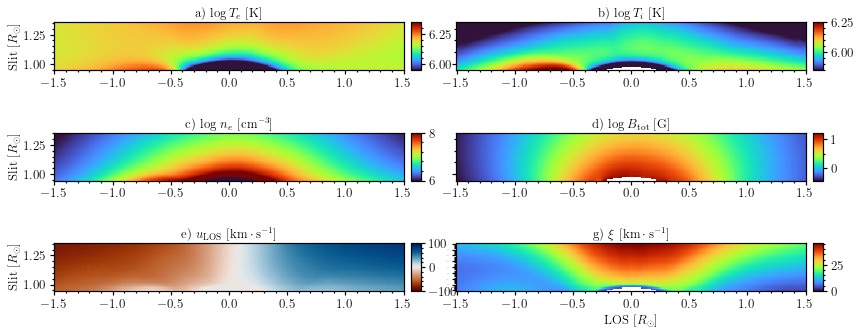

In [56]:
fig, axes = plt.subplots(3,2,figsize=(12,5),constrained_layout=True)
im = axes[0,0].pcolormesh(awsom_x,awsom_z,np.log10(t_e[:,0,:]),rasterized=True,vmin=5.95,vmax=6.35,cmap="turbo",
                        shading='auto')
axes[0,0].axis('scaled')
axes[0,0].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[0,0].set_title(r'a) $\log T_e\ \mathrm{[K]}$',fontsize=13)
axes[0,0].tick_params(labelsize=13)
clb_ax00 = inset_axes(axes[0,0],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[0,0].transAxes,
                 borderpad=0)
clb00 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0,0],cax=clb_ax00)
clb_ax00.tick_params(labelsize=13)
clb_ax00.yaxis.set_minor_locator(AutoMinorLocator(5))
clb_ax00.yaxis.get_offset_text().set_fontsize(15)
#clb_ax00.set_ylabel(r'log $T_e$',fontsize=16)

im = axes[0,1].pcolormesh(awsom_x,awsom_z,np.log10(t[:,0,:]),rasterized=True,vmin=5.85,vmax=6.25,cmap="turbo",
                        shading='auto')
axes[0,1].axis('scaled')
axes[0,1].set_title(r'b) $\log T_i\ \mathrm{[K]}$',fontsize=13)
axes[0,1].tick_params(labelsize=13)
axes[0,1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
axes[0,1].tick_params(axis="y",labelsize=0)

clb_ax01 = inset_axes(axes[0,1],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[0,1].transAxes,
                 borderpad=0)
clb01 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0,1],cax=clb_ax01)
clb_ax01.tick_params(labelsize=13)
clb_ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
clb_ax01.yaxis.get_offset_text().set_fontsize(15)
#clb_ax01.set_ylabel(r'log $T_i$',fontsize=16)

im = axes[1,0].pcolormesh(awsom_x,awsom_z,np.log10(n[:,0,:]/p_e_ratio),vmax=8,vmin=6,rasterized=True,cmap="turbo",
                        shading='auto')
axes[1,0].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[1,0].axis('scaled')
axes[1,0].set_title(r'c) log $n_e\ \mathrm{[cm^{-3}]}$',fontsize=13)
axes[1,0].tick_params(labelsize=13)
clb_ax10 = inset_axes(axes[1,0],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[1,0].transAxes,
                 borderpad=0)
clb10 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1,0],cax=clb_ax10)
clb_ax10.tick_params(labelsize=13)
clb_ax10.yaxis.get_offset_text().set_fontsize(15)
clb_ax10.yaxis.set_minor_locator(AutoMinorLocator(5))
#clb_ax10.set_ylabel(r'log $n$',fontsize=16)

im = axes[1,1].pcolormesh(awsom_x,awsom_z,np.log10(b_tot[:,0,:]),rasterized=True,cmap="turbo",
                        shading='auto')
axes[1,1].axis('scaled')
axes[1,1].set_title(r'd) $\log B_{\rm tot}\ \mathrm{[G]}$',fontsize=13)
axes[1,1].tick_params(labelsize=13)
axes[1,1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
axes[1,1].tick_params(axis="y",labelsize=0)

clb_ax11 = inset_axes(axes[1,1],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[1,1].transAxes,
                 borderpad=0)
clb11 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1,1],cax=clb_ax11)
clb_ax11.tick_params(labelsize=13)
clb_ax11.yaxis.get_offset_text().set_fontsize(15)
clb_ax11.yaxis.set_minor_locator(AutoMinorLocator(2))

im = axes[2,0].pcolormesh(awsom_x,awsom_z,ux_rot[:,0,:],vmin=-100,vmax=100,cmap=cmcm.vik_r,rasterized=True,
                        shading='auto')
axes[2,0].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[2,0].axis('scaled')
axes[2,0].set_title(r'e) $u_{\rm LOS}\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
axes[2,0].tick_params(labelsize=13)
clb_ax20 = inset_axes(axes[2,0],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[2,0].transAxes,
                 borderpad=0)
clb20 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2,0],cax=clb_ax20)
clb_ax20.tick_params(labelsize=13)
clb_ax20.yaxis.get_offset_text().set_fontsize(15)
clb_ax20.yaxis.set_minor_locator(AutoMinorLocator(5))

# im = axes[2,1].pcolormesh(awsom_x,awsom_z,u_tot[:,0,:],vmin=0,rasterized=True,cmap="turbo")
# axes[2,1].axis('scaled')
# axes[2,1].set_title(r'f) $u_{\rm tot}\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
# axes[2,1].tick_params(labelsize=13)
# axes[2,1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# axes[2,1].tick_params(axis="y",labelsize=0)

# clb_ax21 = inset_axes(axes[2,1],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[2,1].transAxes,
#                  borderpad=0)
# clb21 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2,1],cax=clb_ax21)
# clb_ax21.tick_params(labelsize=13)
# clb_ax21.yaxis.get_offset_text().set_fontsize(15)
# clb_ax21.yaxis.set_minor_locator(AutoMinorLocator(5))

cos_theta = np.sqrt(1 - np.square(bx_rot)/np.square(b_tot))
vnt = 0.5*np.sqrt((I01 + I02)/m_p/n)*cos_theta
im = axes[2,1].pcolormesh(awsom_x,awsom_z,vnt[:,0,:]/1e5,vmin=0,rasterized=True,cmap="turbo",
                        shading='auto')
#axes[2,1].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[2,1].set_xlabel(r'LOS $[R_\odot]$',fontsize=13)
axes[2,1].axis('scaled')
axes[2,1].set_title(r'g) $\xi\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
axes[2,1].tick_params(labelsize=13)
axes[2,1].tick_params(axis="y",labelsize=0)
clb_ax21 = inset_axes(axes[2,1],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[2,1].transAxes,
                 borderpad=0)
clb21 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2,1],cax=clb_ax21)
clb_ax21.tick_params(labelsize=13)
clb_ax21.yaxis.get_offset_text().set_fontsize(15)
clb_ax21.yaxis.set_minor_locator(AutoMinorLocator(5))

# cos_theta = np.sqrt(1 - np.square(bx_rot)/np.square(b_tot))
# vnt = 0.5*np.sqrt((I01 + I02)/m_p/n)*cos_theta
# im = axes[3,0].pcolormesh(awsom_x,awsom_z,vnt[:,0,:]/1e5,vmin=0,rasterized=True,cmap="turbo")
# axes[3,0].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
# axes[3,0].set_xlabel(r'LOS $[R_\odot]$',fontsize=13)
# axes[3,0].axis('scaled')
# axes[3,0].set_title(r'g) $\xi\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
# axes[3,0].tick_params(labelsize=13)
# clb_ax30 = inset_axes(axes[3,0],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[3,0].transAxes,
#                  borderpad=0)
# clb30 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3,0],cax=clb_ax30)
# clb_ax30.tick_params(labelsize=13)
# clb_ax30.yaxis.get_offset_text().set_fontsize(15)
# clb_ax30.yaxis.set_minor_locator(AutoMinorLocator(5))
#clb_ax.set_ylabel(r'$\xi\ (\mathrm{km\cdot s^{-1}})$',fontsize=16)

# %store -r ctb_195
# im = axes[3,1].pcolormesh(awsom_x,awsom_z,np.log10(ctb_195),vmin=-5,vmax=2,rasterized=True,cmap="turbo")
# axes[3,1].axis('scaled')
# axes[3,1].set_title(r'h) $\log C_{\rm I,195}$',fontsize=13)
# axes[3,1].set_xlabel(r'LOS $[R_\odot]$',fontsize=13)
# axes[3,1].tick_params(labelsize=13)
# axes[3,1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# axes[3,1].tick_params(axis="y",labelsize=0)

# clb_ax31 = inset_axes(axes[3,1],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[3,1].transAxes,
#                  borderpad=0)
# clb31 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3,1],cax=clb_ax31)
# clb_ax31.tick_params(labelsize=13)
# clb_ax31.yaxis.get_offset_text().set_fontsize(15)
# clb_ax31.yaxis.set_minor_locator(AutoMinorLocator(5))

for ax_ in axes.flatten():
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.2,length=4)
    ax_.tick_params(which="minor",width=1.2,length=2)
    
for ax_ in [clb_ax00,clb_ax01,clb_ax10,clb_ax11,clb_ax20,clb_ax21]:
    ax_.tick_params(which="major",width=1.2,length=4)
    ax_.tick_params(which="minor",width=1.2,length=2)

plt.subplots_adjust(bottom = 0.05,left=0.07,top=0.97,right=0.94,hspace=0,wspace=0.15)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log10


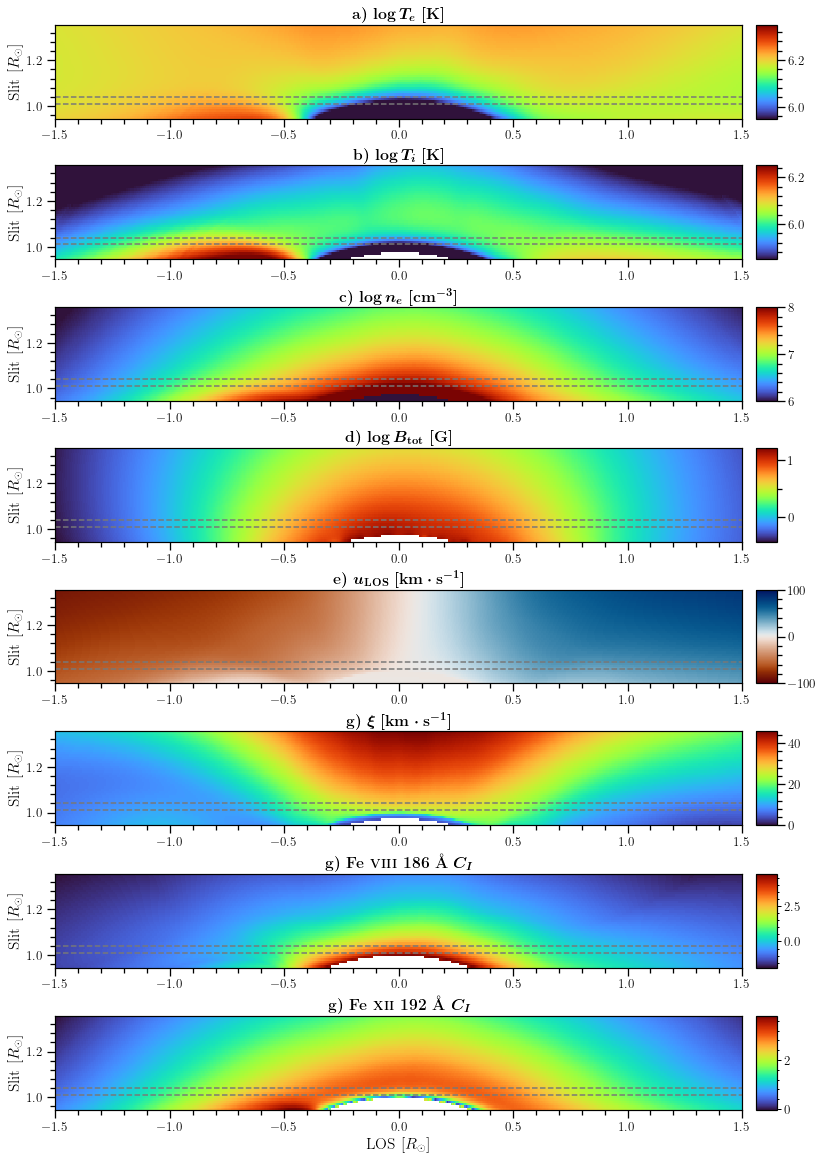

In [90]:
fig, axes = plt.subplots(8,1,figsize=(12,16),constrained_layout=True)
im = axes[0].pcolormesh(awsom_x,awsom_z,np.log10(t_e[:,0,:]),rasterized=True,vmin=5.95,vmax=6.35,cmap="turbo",
                        shading='auto')
axes[0].axis('scaled')
axes[0].set_ylabel(r'Slit $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a)} $\boldsymbol{\log T_e\ \mathrm{[K]}}$',fontsize=16)
axes[0].tick_params(labelsize=13)
clb_ax00 = inset_axes(axes[0],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[0].transAxes,
                 borderpad=0)
clb00 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax00)
clb_ax00.tick_params(labelsize=13)
clb_ax00.yaxis.set_minor_locator(AutoMinorLocator(5))
clb_ax00.yaxis.get_offset_text().set_fontsize(15)
#clb_ax00.set_ylabel(r'log $T_e$',fontsize=16)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.log10(t[:,0,:]),rasterized=True,vmin=5.85,vmax=6.25,cmap="turbo",
                        shading='auto')
axes[1].axis('scaled')
axes[1].set_title(r'\textbf{b)} $\boldsymbol{\log T_i\ \mathrm{[K]}}$',fontsize=16)
axes[1].tick_params(labelsize=13)
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
#axes[1].tick_params(axis="y",labelsize=0)

clb_ax01 = inset_axes(axes[1],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[1].transAxes,
                 borderpad=0)
clb01 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax01)
clb_ax01.tick_params(labelsize=13)
clb_ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
clb_ax01.yaxis.get_offset_text().set_fontsize(15)
#clb_ax01.set_ylabel(r'log $T_i$',fontsize=16)

im = axes[2].pcolormesh(awsom_x,awsom_z,np.log10(n[:,0,:]/p_e_ratio),vmax=8,vmin=6,rasterized=True,cmap="turbo",
                        shading='auto')
axes[2].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[2].axis('scaled')
axes[2].set_title(r'\textbf{c)} $\boldsymbol{\log n_e\ \mathrm{[cm^{-3}]}}$',fontsize=16)
axes[2].tick_params(labelsize=13)
clb_ax10 = inset_axes(axes[2],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[2].transAxes,
                 borderpad=0)
clb10 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax10)
clb_ax10.tick_params(labelsize=13)
clb_ax10.yaxis.get_offset_text().set_fontsize(15)
clb_ax10.yaxis.set_minor_locator(AutoMinorLocator(5))
#clb_ax10.set_ylabel(r'log $n$',fontsize=16)

im = axes[3].pcolormesh(awsom_x,awsom_z,np.log10(b_tot[:,0,:]),rasterized=True,cmap="turbo",
                        shading='auto')
axes[3].axis('scaled')
axes[3].set_title(r'\textbf{d)} $\boldsymbol{\log B_{\rm tot}\ \mathrm{[G]}}$',fontsize=16)
axes[3].tick_params(labelsize=13)
axes[3].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
#axes[3].tick_params(axis="y",labelsize=0)

clb_ax11 = inset_axes(axes[3],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[3].transAxes,
                 borderpad=0)
clb11 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3],cax=clb_ax11)
clb_ax11.tick_params(labelsize=13)
clb_ax11.yaxis.get_offset_text().set_fontsize(15)
clb_ax11.yaxis.set_minor_locator(AutoMinorLocator(2))

im = axes[4].pcolormesh(awsom_x,awsom_z,ux_rot[:,0,:],vmin=-100,vmax=100,cmap=cmcm.vik_r,rasterized=True,
                        shading='auto')
axes[4].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[4].axis('scaled')
axes[4].set_title(r'\textbf{e)} $\boldsymbol{u_{\rm LOS}\ [\mathrm{km\cdot s^{-1}}]}$',fontsize=16)
axes[4].tick_params(labelsize=13)
clb_ax20 = inset_axes(axes[4],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[4].transAxes,
                 borderpad=0)
clb20 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[4],cax=clb_ax20)
clb_ax20.tick_params(labelsize=13)
clb_ax20.yaxis.get_offset_text().set_fontsize(15)
clb_ax20.yaxis.set_minor_locator(AutoMinorLocator(5))

# im = axes[5].pcolormesh(awsom_x,awsom_z,u_tot[:,0,:],vmin=0,rasterized=True,cmap="turbo")
# axes[5].axis('scaled')
# axes[5].set_title(r'f) $u_{\rm tot}\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
# axes[5].tick_params(labelsize=13)
# axes[5].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# axes[5].tick_params(axis="y",labelsize=0)

# clb_ax21 = inset_axes(axes[5],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[5].transAxes,
#                  borderpad=0)
# clb21 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[5],cax=clb_ax21)
# clb_ax21.tick_params(labelsize=13)
# clb_ax21.yaxis.get_offset_text().set_fontsize(15)
# clb_ax21.yaxis.set_minor_locator(AutoMinorLocator(5))

cos_theta = np.sqrt(1 - np.square(bx_rot)/np.square(b_tot))
vnt = 0.5*np.sqrt((I01 + I02)/m_p/n)*cos_theta
im = axes[5].pcolormesh(awsom_x,awsom_z,vnt[:,0,:]/1e5,vmin=0,rasterized=True,cmap="turbo",
                        shading='auto')
#axes[5].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
#axes[5].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[5].axis('scaled')
axes[5].set_title(r'\textbf{g)} $\boldsymbol{\xi\ [\mathrm{km\cdot s^{-1}}]}$',fontsize=16)
axes[5].tick_params(labelsize=13)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax21 = inset_axes(axes[5],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[5].transAxes,
                 borderpad=0)
clb21 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[5],cax=clb_ax21)
clb_ax21.tick_params(labelsize=13)
clb_ax21.yaxis.get_offset_text().set_fontsize(15)
clb_ax21.yaxis.set_minor_locator(AutoMinorLocator(5))

im = axes[6].pcolormesh(awsom_x,awsom_z,np.log10(ctb_FeVIII_186),rasterized=True,cmap="turbo",
                        shading='auto')
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[6].axis('scaled')
axes[6].set_title(r'\textbf{g) Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{C_I}$',fontsize=16)
axes[6].tick_params(labelsize=13)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax30 = inset_axes(axes[6],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[6].transAxes,
                 borderpad=0)
clb30 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[6],cax=clb_ax30)
clb_ax30.tick_params(labelsize=13)
clb_ax30.yaxis.get_offset_text().set_fontsize(15)
clb_ax30.yaxis.set_minor_locator(AutoMinorLocator(5))

im = axes[7].pcolormesh(awsom_x,awsom_z,np.log10(ctb_FeXII_192),rasterized=True,cmap="turbo",
                        shading='auto')
axes[7].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[7].axis('scaled')
axes[7].set_title(r'\textbf{g) Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{C_I}$',fontsize=16)
axes[7].tick_params(labelsize=13)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax31 = inset_axes(axes[7],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[7].transAxes,
                 borderpad=0)
clb31 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[7],cax=clb_ax31)
clb_ax31.tick_params(labelsize=13)
clb_ax31.yaxis.get_offset_text().set_fontsize(15)
clb_ax31.yaxis.set_minor_locator(AutoMinorLocator(5))

# cos_theta = np.sqrt(1 - np.square(bx_rot)/np.square(b_tot))
# vnt = 0.5*np.sqrt((I01 + I02)/m_p/n)*cos_theta
# im = axes[3,0].pcolormesh(awsom_x,awsom_z,vnt[:,0,:]/1e5,vmin=0,rasterized=True,cmap="turbo")
# axes[3,0].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
# axes[3,0].set_xlabel(r'LOS $[R_\odot]$',fontsize=13)
# axes[3,0].axis('scaled')
# axes[3,0].set_title(r'g) $\xi\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
# axes[3,0].tick_params(labelsize=13)
# clb_ax30 = inset_axes(axes[3,0],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[3,0].transAxes,
#                  borderpad=0)
# clb30 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3,0],cax=clb_ax30)
# clb_ax30.tick_params(labelsize=13)
# clb_ax30.yaxis.get_offset_text().set_fontsize(15)
# clb_ax30.yaxis.set_minor_locator(AutoMinorLocator(5))
#clb_ax.set_ylabel(r'$\xi\ (\mathrm{km\cdot s^{-1}})$',fontsize=16)

# %store -r ctb_195
# im = axes[3,1].pcolormesh(awsom_x,awsom_z,np.log10(ctb_195),vmin=-5,vmax=2,rasterized=True,cmap="turbo")
# axes[3,1].axis('scaled')
# axes[3,1].set_title(r'h) $\log C_{\rm I,195}$',fontsize=13)
# axes[3,1].set_xlabel(r'LOS $[R_\odot]$',fontsize=13)
# axes[3,1].tick_params(labelsize=13)
# axes[3,1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# axes[3,1].tick_params(axis="y",labelsize=0)

# clb_ax31 = inset_axes(axes[3,1],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[3,1].transAxes,
#                  borderpad=0)
# clb31 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3,1],cax=clb_ax31)
# clb_ax31.tick_params(labelsize=13)
# clb_ax31.yaxis.get_offset_text().set_fontsize(15)
# clb_ax31.yaxis.set_minor_locator(AutoMinorLocator(5))

for ax_ in axes.flatten():
    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=16)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")

#for ax_ in axes[:-1].flatten(): 
    #ax_.tick_params(axis="x",labelsize=0)
for ax_ in [clb_ax00,clb_ax01,clb_ax10,clb_ax11,clb_ax20,clb_ax21]:
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)

#plt.subplots_adjust(bottom = 0.05,left=0.07,top=0.97,right=0.94,hspace=0,wspace=0.15)